In [2]:
pip install pytrends plotly 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from pytrends.request import TrendReq


# setup pytrend library and keyword

In [31]:
pytrends=TrendReq(hl='en-US',tz=360)
keyword="chat gpt"

# Data Request

In [32]:
pytrends.build_payload([keyword],cat=0,timeframe='today 12-m',geo='',gprop='')

# country wise interest

In [35]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(20)

In [36]:
region_data.head(20)

,chat gpt
geoName,
Madagascar,100
Slovenia,53
Vietnam,51
Peru,47
Israel,41
United Arab Emirates,41
Ecuador,41
Moldova,40
Croatia,38


In [37]:
region_data.index
# region_data[keyword]

Index(['Madagascar', 'Slovenia', 'Vietnam', 'Peru', 'Israel',
       'United Arab Emirates', 'Ecuador', 'Moldova', 'Croatia', 'South Korea',
       'Lithuania', 'Greece', 'Bosnia & Herzegovina', 'Bolivia', 'Romania',
       'Oman', 'Colombia', 'Serbia', 'Thailand', 'Qatar'],
      dtype='object', name='geoName')

 # Top  countries where the keywords are searched the most

C:\Users\pulib\AppData\Local\Temp\ipykernel_34160\673897325.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




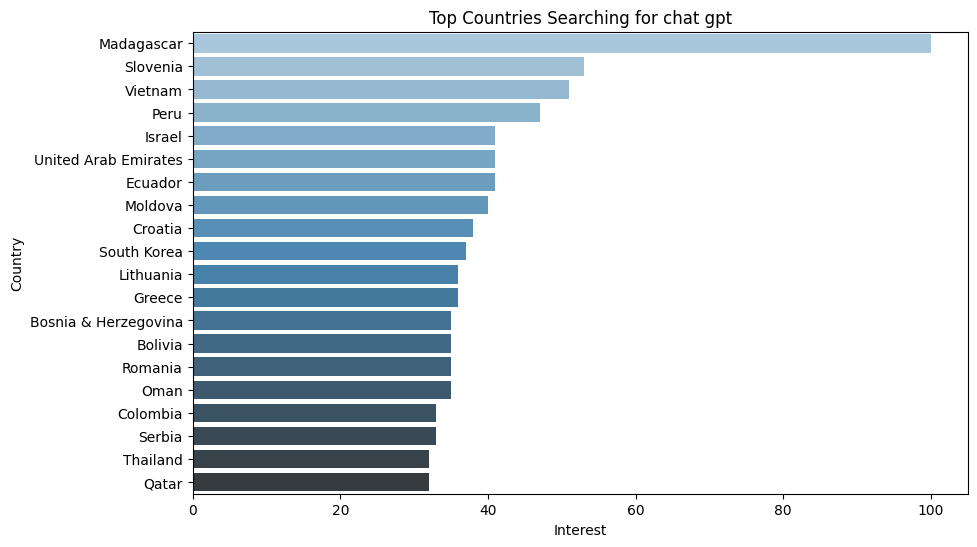

In [38]:

plt.figure(figsize=(10,6))
sn.barplot(x=region_data[keyword], y=region_data.index,palette="Blues_d")
plt.title(f"Top Countries Searching for {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

#  A world map plotted showing the countries that search the keyword the most.

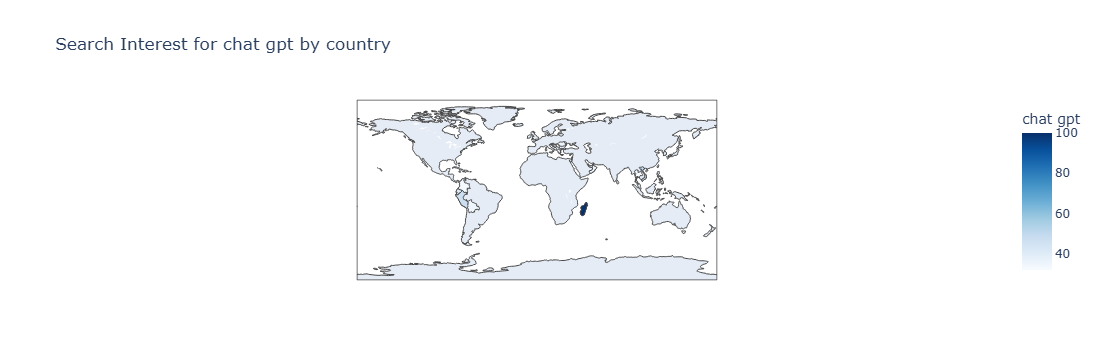

In [39]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                 locations='geoName',
                 locationmode='country names',
                 color=keyword,
                 title=f"Search Interest for {keyword} by country",
                 color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [42]:
time_df=pytrends.interest_over_time()

C:\Users\pulib\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



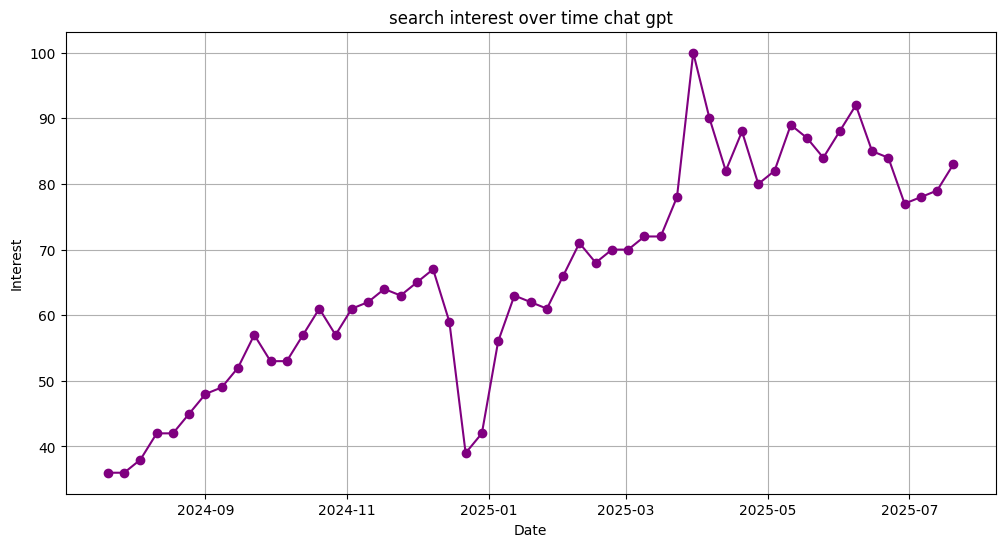

In [43]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"search interest over time {keyword}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()


# Multiple keyword comparision

In [45]:
kw_list=["cloud computing","data science","machine learning"]
pytrends.build_payload(kw_list,cat=0,timeframe= 'today 12-m',geo='',gprop='')

C:\Users\pulib\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



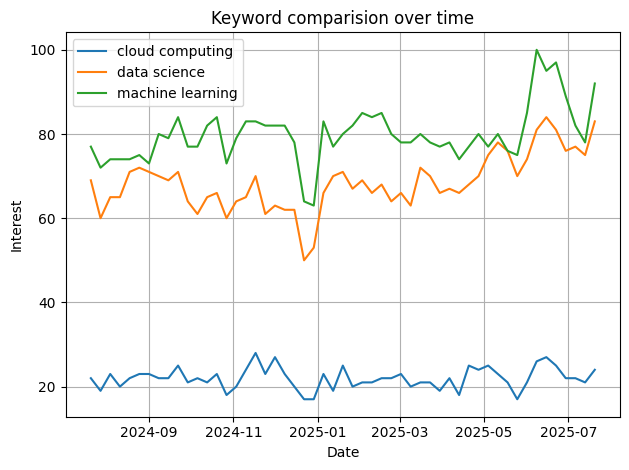

In [48]:
compare_df=pytrends.interest_over_time()

for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)

plt.title("Keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    